In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('CNS5.csv')

In [6]:
df.columns

Index(['cns5_id', 'gj_id', 'component_id', 'n_components', 'primary_flag',
       'gj_system_primary', 'gaia_edr3_id', 'hip_id', 'ra', 'dec', 'epoch',
       'coordinates_bibcode', 'parallax', 'parallax_error', 'parallax_bibcode',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'pm_bibcode', 'rv',
       'rv_error', 'rv_bibcode', 'g_mag', 'g_mag_error', 'bp_mag',
       'bp_mag_error', 'rp_mag', 'rp_mag_error', 'g_mag_from_hip',
       'g_mag_from_hip_error', 'g_rp_from_hip', 'g_rp_from_hip_error',
       'g_mag_resulting', 'g_mag_resulting_error', 'g_rp_resulting',
       'g_rp_resulting_error', 'g_rp_resulting_flag', 'j_mag', 'j_mag_error',
       'h_mag', 'h_mag_error', 'k_mag', 'k_mag_error', 'jhk_mag_bibcode',
       'w1_mag', 'w1_mag_error', 'w2_mag', 'w2_mag_error', 'w3_mag',
       'w3_mag_error', 'w4_mag', 'w4_mag_error', 'wise_mag_bibcode'],
      dtype='object')

In [7]:
df.shape

(5909, 54)

g_rp_resulting = resulting (deblended) g-rp color<br>
is this the righe one???

In [8]:
x = df['g_mag'] - df['rp_mag']
y = df['g_mag']
resulting_x = df['g_rp_resulting']

bright cut at: y = 4<br>
faint cut at: M_G = b + m * (G-RP)
where 
- m = (21 - 12.5) / (1.4 - 0.5)
- b = 10 - m * 0.5	

In [9]:
slope = (21 - 12.5) / (1.4 - 0.5)
intercept = 10 - slope * 0.5

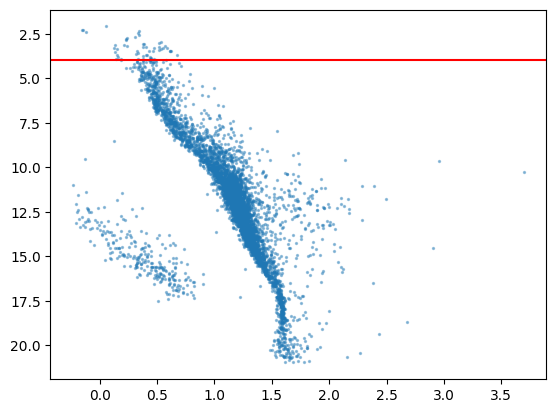

In [10]:


scatter = plt.scatter(x, y, 2, alpha = 0.4)
ax = scatter.axes
ax.invert_yaxis()
plt.axhline(y = 4, color = 'r', linestyle = '-')

Text(0, 0.5, 'G-Mag')

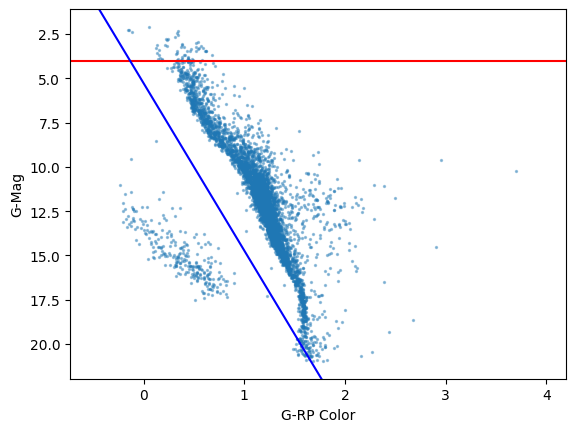

In [11]:
fig, ax = plt.subplots()
ax.scatter(x, y, 2, alpha = 0.4)

x_padding = 0.5
y_padding = 1
ax.set_xlim([min(x) - x_padding, max(x) + x_padding])
ax.set_ylim([min(y) - y_padding, max(y) + y_padding])

ax.axes.invert_yaxis()
ax.axhline(y = 4, color = 'r', linestyle = '-')

# find max and min value of g-rp
x_vals = [-2, 3]
y_vals = [slope * x + intercept for x in x_vals]
ax.plot(x_vals, y_vals, color = 'blue')

ax.set_xlabel('G-RP Color')
ax.set_ylabel('G-Mag')

In [12]:
chris_slope = (21 - 12.5) / (1.4 - 0.5)
chris_intercept = 10 - slope * 0.5

def make_plot(slope, intercept):
    # create a trace for the scatter plot
    scatter_trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(size=3, opacity=0.7), showlegend=False)

    # create a trace for the horizontal line
    hline_trace = go.Scatter(x=[-1, 2.5], y=[4, 4], mode='lines', line=dict(color='red', width=1), name = 'Bright Cut')

    # create a trace for the linear line
    x_vals = [-1, 2.5]  # extend the line beyond the x range of the scatter plot
    y_vals = [slope * x + intercept for x in x_vals]
    line_trace = go.Scatter(x=x_vals, y=y_vals, mode='lines', line=dict(color='blue', width=1), name = 'Faint Cut')

    # create the layout for the plot
    layout = go.Layout(title='G-RP vs G-MAG for CNS5 Catalog',
                    xaxis=dict(title='G-RP Color'),
                    yaxis=dict(title='G-Mag', autorange='reversed'),
                    height=500, width=700)

    # create a figure and add the traces and layout
    fig = go.Figure(data=[scatter_trace, hline_trace, line_trace], layout=layout)

    # display the plot
    return fig

make_plot(chris_slope, chris_intercept)

In [13]:
# whats getting cut off?

removed = df.loc[df['g_rp_resulting'] >= 1.5].copy()

# calculate the y value for faint cut linear cut at each g-rp value of removed
removed['faint_cut'] = x * slope + intercept
removed = removed.loc[removed['g_mag'] >= removed['faint_cut']]
removed

,cns5_id,gj_id,component_id,n_components,primary_flag,gj_system_primary,gaia_edr3_id,hip_id,ra,dec,...,w1_mag,w1_mag_error,w2_mag,w2_mag_error,w3_mag,w3_mag_error,w4_mag,w4_mag_error,wise_mag_bibcode,faint_cut
209,5746,13346,NaN,NaN,0,NaN,2.233222e+18,NaN,349.842713,76.762457,...,12.928,0.118,12.448,0.023,11.522,0.149,8.653,NaN,2014yCat.2328....0C,19.763346
883,1518,10870,NaN,NaN,0,NaN,9.632930e+17,NaN,91.925816,45.842762,...,12.860,0.024,12.541,0.024,11.767,0.252,9.069,NaN,2014yCat.2328....0C,19.861483
938,2470,11437,B,2.0,0,11438.0,8.240171e+17,NaN,151.085035,50.382254,...,11.700,0.023,11.134,0.024,10.273,0.068,8.540,0.38,2014yCat.2328....0C,20.033721
943,2690,11573,NaN,NaN,0,NaN,8.330434e+17,NaN,165.039155,49.962390,...,12.970,0.024,12.622,0.023,12.246,0.408,8.669,NaN,2014yCat.2328....0C,20.052072
1356,163,10087,NaN,NaN,0,NaN,2.373841e+18,NaN,8.350860,-15.358471,...,12.819,0.024,12.497,0.025,11.848,0.310,9.032,NaN,2014yCat.2328....0C,19.323537
1664,5606,13274,NaN,NaN,0,NaN,1.877650e+18,NaN,340.723604,25.715614,...,12.521,0.023,12.199,0.023,11.790,0.259,8.783,NaN,2014yCat.2328....0C,19.647972
1672,5631,13288,A,2.0,1,NaN,1.890434e+18,NaN,342.292104,32.096130,...,12.944,0.024,12.626,0.025,12.298,0.354,8.761,NaN,2014yCat.2328....0C,20.500258
1821,497,10276,NaN,NaN,0,NaN,2.570825e+18,NaN,28.766267,9.833052,...,12.561,0.023,12.210,0.023,11.984,0.232,8.762,NaN,2014yCat.2328....0C,19.537397
1918,386,10205,NaN,NaN,0,NaN,3.224925e+17,NaN,22.828883,38.031903,...,12.453,0.022,12.202,0.022,11.797,0.175,9.363,NaN,2014yCat.2328....0C,19.651693
2190,1255,10717,NaN,NaN,0,NaN,3.228125e+18,NaN,75.351201,-0.179975,...,12.050,0.023,11.522,0.022,10.746,0.106,8.944,NaN,2014yCat.2328....0C,19.704903


In [14]:
# create a trace for the scatter plot
true_trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(size=3, opacity=0.5, color = 'red'), name = 'G-RP')
resulting_trace = go.Scatter(x=resulting_x, y=y, mode='markers', marker=dict(size=3, opacity=0.5, color = 'blue'), name = 'G_RP (deblended)')

# create a trace for the horizontal line
hline_trace = go.Scatter(x=[-1, 2.5], y=[4, 4], mode='lines', line=dict(color='orange', width=1), name = 'Bright Cut')

# create a trace for the linear line
x_vals = [-1, 2.5]  # extend the line beyond the x range of the scatter plot
y_vals = [slope * x + intercept for x in x_vals]
line_trace = go.Scatter(x=x_vals, y=y_vals, mode='lines', line=dict(color='grey', width=1), name = 'Faint Cut')

# create the layout for the plot
layout = go.Layout(title='G-RP [G-MAG - RP-MAG] vs G-RP (deblended) for CNS5 Catalog',
                   xaxis=dict(title='G-RP Color'),
                   yaxis=dict(title='G-Mag', autorange='reversed'),
                   height=600, width=800)

# create a figure and add the traces and layout
fig = go.Figure(data=[true_trace, resulting_trace, hline_trace, line_trace], layout=layout)

# display the plot
fig.show()



In [31]:
chris_slope = (21 - 12.5) / (1.4 - 0.5)
chris_intercept = 10 - chris_slope * 0.5

make_plot(chris_slope, chris_intercept)

In [16]:
p1 = (1.4, 21)
p2 = (0.6, 10.5)

so_slope = (p1[1] - p2[1]) / (p1[0] - p2[0])
so_intercept = 9.5 - so_slope * 0.5

make_plot(so_slope, so_intercept)

In [17]:
p1 = (1.4, 21)
p2 = (0.6, 10.5)

so_slope = (21 - 10.5) / (1.4 - 0.6)
so_intercept = 9.5 - so_slope * 0.5

fig = make_plot(so_slope, so_intercept)


In [38]:
def make_plot_1(slope, intercept, text_1, text_2):
    # create a trace for the scatter plot
    scatter_trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(size=3, opacity=0.7), showlegend=False)

    # create a trace for the horizontal line
    hline_trace = go.Scatter(x=[-1, 2.5], y=[4, 4], mode='lines', line=dict(color='black', width=1), name = 'Bright Cut')

    # create a trace for the linear line
    x_vals = [-1, 2.5]  # extend the line beyond the x range of the scatter plot
    y_vals_new = [slope * x + intercept for x in x_vals]
    new_line_trace = go.Scatter(x=x_vals, y=y_vals_new, mode='lines', line=dict(color='blue', width=1), name = 'New Faint Cut')

    y_vals_old = [chris_slope * x + chris_intercept for x in x_vals]
    old_line_trace = go.Scatter(x=x_vals, y=y_vals_old, mode='lines', line=dict(color='red', width=1), name = 'Old Faint Cut')

    # create a trace for the text
    text_trace_1 = go.Scatter(x=[-0.5], y=[25], mode='text', text=[text_1], showlegend=False,
                            textfont=dict(size=12, color='black'), textposition='bottom right')
    text_trace_2 = go.Scatter(x=[-0.5], y=[28], mode='text', text=[text_2], showlegend=False,
                            textfont=dict(size=12, color='black'), textposition='bottom right')

    # create the layout for the plot
    layout = go.Layout(title='G-RP vs G-MAG for CNS5 Catalog',
                    xaxis=dict(title='G-RP Color'),
                    yaxis=dict(title='G-Mag', autorange='reversed'),
                    height=500, width=700)

    # create a figure and add the traces and layout
    fig = go.Figure(data=[scatter_trace, hline_trace, new_line_trace, old_line_trace, text_trace_1, text_trace_2], layout=layout)

    # display the plot
    return fig

In [39]:
make_plot_1(so_slope, so_intercept, 'slope = (21 - 10.5) / (1.4 - 0.6)', 'intercept = 9.5 - so_slope * 0.5')